In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data.csv', sep=',')
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [3]:
df.shape

(366, 12)

In [4]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [8]:
df = df.drop(columns='day')

In [9]:
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [10]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [11]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [12]:
df['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [13]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].median())

In [14]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [15]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
df['rainfall'] = df['rainfall'].map({'yes':1, 'no': 0})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    float64
 10  windspeed      366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


# Exploratory Data Analysis

In [18]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']

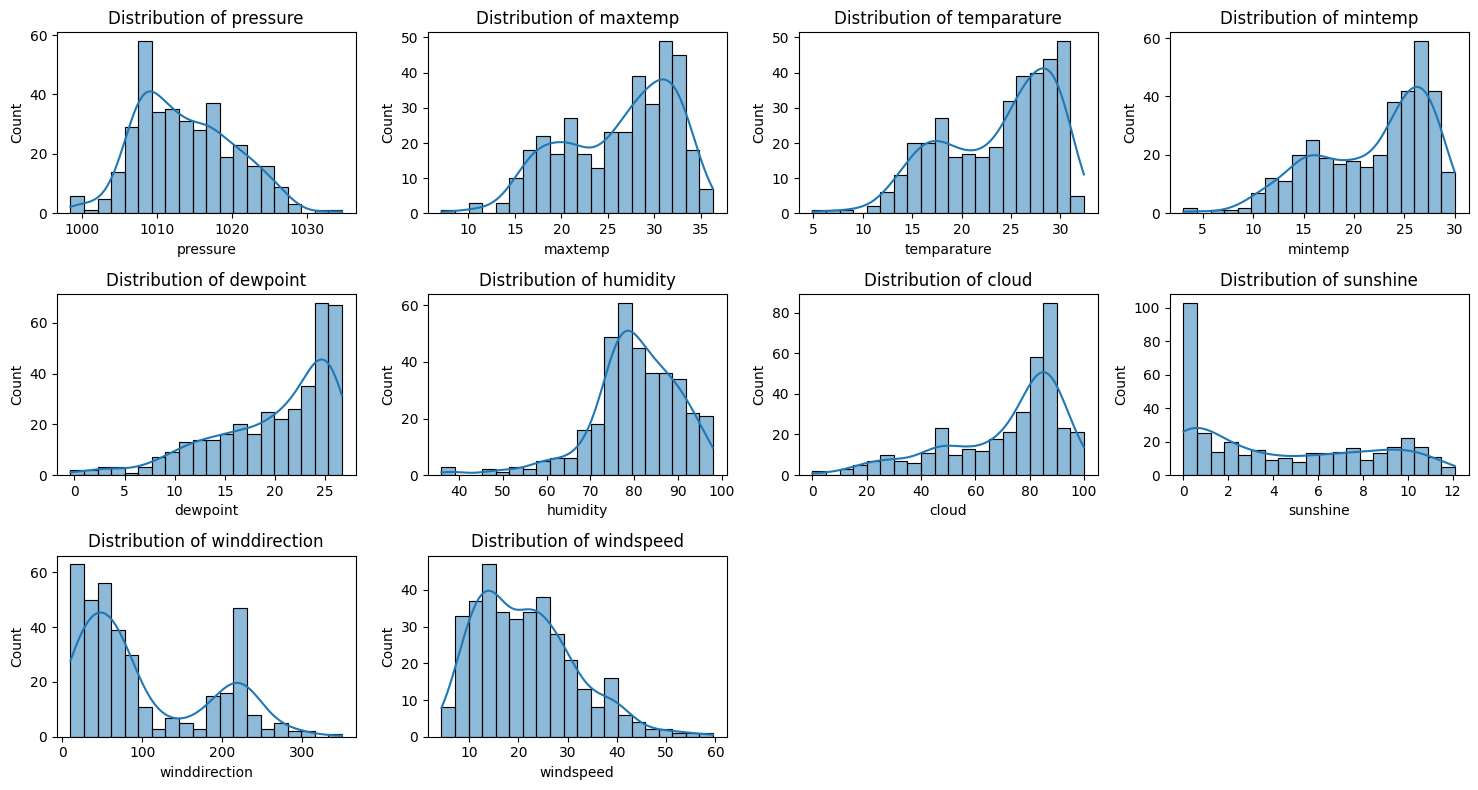

In [19]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True, bins= 20)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

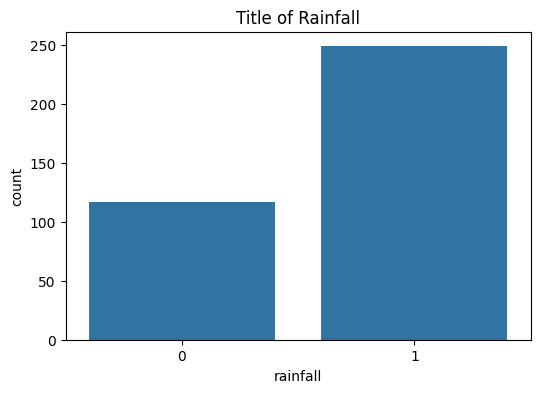

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x = 'rainfall', data=df)
plt.title('Title of Rainfall')
plt.show()

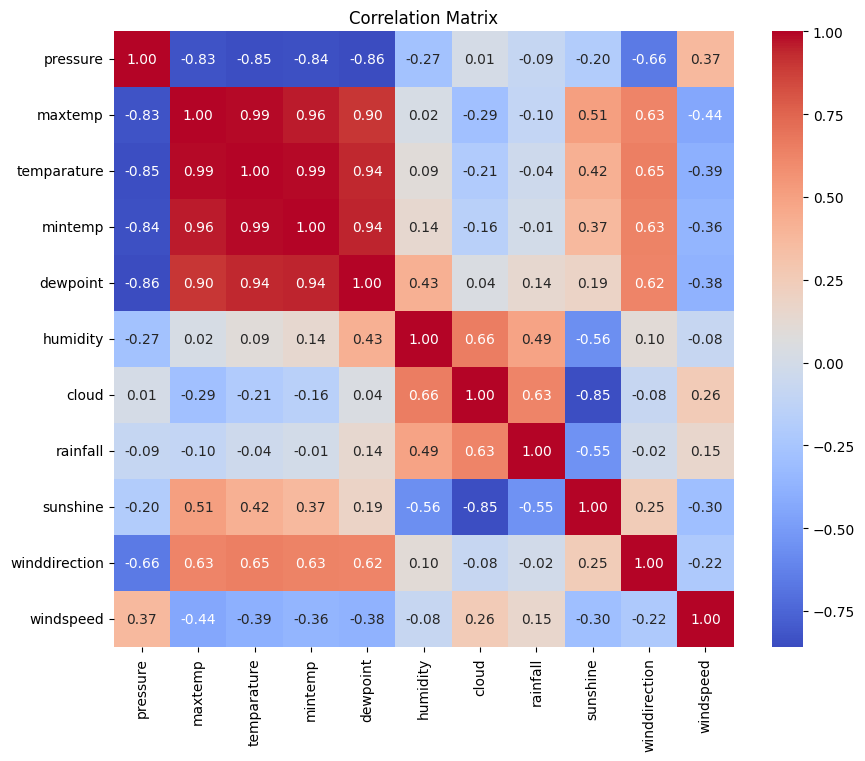

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

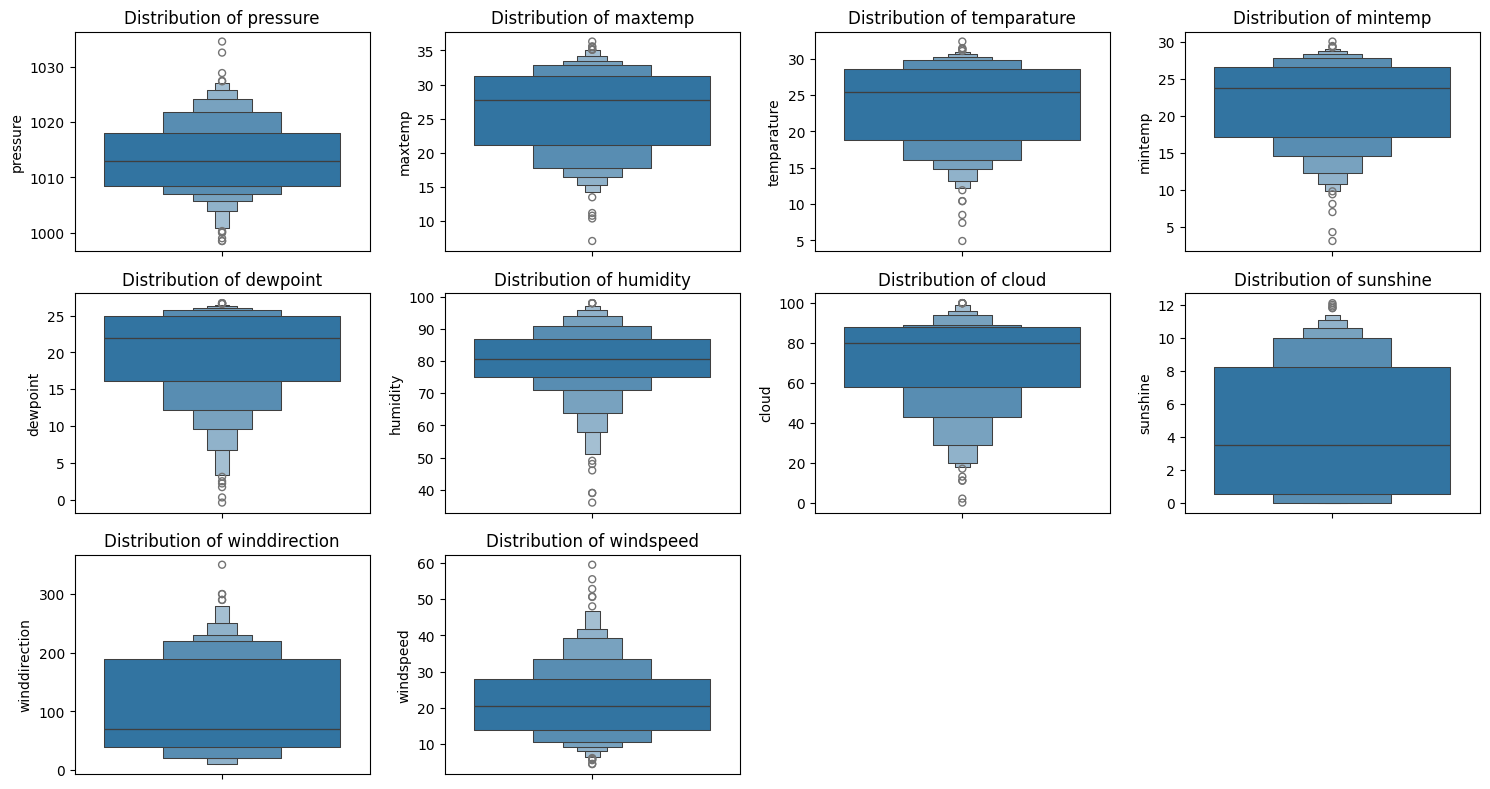

In [22]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.boxenplot(df[column])
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

In [23]:
df = df.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [24]:
df

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...
361,1022.7,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,13.3,78,86,1,1.2,20.0,20.9


In [25]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [26]:
df_majority = df[df['rainfall'] == 1]
df_minority = df[df['rainfall'] == 0]

In [27]:
downsample_indices = np.random.choice(df_majority.index, size=len(df_minority), replace=False)

In [28]:
df_majority_downsampled = df_majority.loc[downsample_indices]

In [29]:
df_majority_downsampled.shape

(117, 8)

In [30]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [31]:
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [32]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [33]:
df_downsampled = df_downsampled.sample(frac=1, random_state= 42).reset_index(drop=True)

In [34]:
df_downsampled

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1014.3,16.0,97,97,1,0.0,50.0,26.5
1,1008.1,25.6,79,43,0,9.7,240.0,24.9
2,1016.8,21.7,77,77,1,3.0,80.0,37.5
3,1018.9,12.9,92,100,1,0.0,50.0,35.3
4,1009.3,25.3,76,44,1,10.1,200.0,9.5
...,...,...,...,...,...,...,...,...
229,1014.9,18.2,91,76,1,0.0,40.0,13.8
230,1005.6,20.0,56,53,0,10.4,230.0,15.5
231,1002.2,25.5,77,70,0,7.7,350.0,13.6
232,1020.8,7.2,54,29,0,10.2,40.0,17.2


In [35]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

# Model Building

In [36]:
X = df_downsampled.drop(columns=['rainfall'])
y = df_downsampled['rainfall']

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
rf_model = RandomForestClassifier(random_state=42)


param_grid_rf = {
    'n_estimators':[50, 100, 200],
    'max_features':['sqrt', 'log2'],
    'max_depth':[None, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

In [39]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

In [46]:
grid_search_rf.fit(Xtrain, ytrain)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [47]:
best_rf_model = grid_search_rf.best_estimator_

In [48]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [49]:
cv_scores = cross_val_score(best_rf_model, Xtrain, ytrain, cv = 5)

In [51]:
np.mean(cv_scores)

np.float64(0.7486486486486486)

In [52]:
y_pred = best_rf_model.predict(Xtest)

In [53]:
accuracy_score(ytest, y_pred)

0.7872340425531915

In [54]:
confusion_matrix(ytest, y_pred)

array([[21,  4],
       [ 6, 16]])

In [58]:
report_dict = classification_report(ytest, y_pred, output_dict=True)

In [59]:
report_dict

{'0': {'precision': 0.7777777777777778,
  'recall': 0.84,
  'f1-score': 0.8076923076923077,
  'support': 25.0},
 '1': {'precision': 0.8,
  'recall': 0.7272727272727273,
  'f1-score': 0.7619047619047619,
  'support': 22.0},
 'accuracy': 0.7872340425531915,
 'macro avg': {'precision': 0.788888888888889,
  'recall': 0.7836363636363637,
  'f1-score': 0.7847985347985348,
  'support': 47.0},
 'weighted avg': {'precision': 0.788179669030733,
  'recall': 0.7872340425531915,
  'f1-score': 0.7862598394513288,
  'support': 47.0}}

# ML Flow

In [60]:
import mlflow
import mlflow.sklearn

In [65]:
mlflow.set_experiment('RainFall')
mlflow.set_tracking_uri(uri='http://127.0.0.1:5000')


with mlflow.start_run():
    mlflow.log_params(grid_search_rf.best_params_)
    mlflow.log_metric('accuracy', report_dict['accuracy'])
    mlflow.log_metric('recall_class_0', report_dict['0']['recall'])
    mlflow.log_metric('recall_class_1', report_dict['1']['recall'])
    mlflow.log_metric('f1_score_macro', report_dict['macro avg']['f1-score'])

    mlflow.sklearn.log_model(best_rf_model, 'Random Forest Model Data')

2025/01/02 09:31:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run defiant-mouse-760 at: http://127.0.0.1:5000/#/experiments/416496187800195273/runs/9917d919de3e4e2387686fdceeaeb282
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/416496187800195273


In [66]:
model_name = 'Random Forest Model Data'
run_id = '9917d919de3e4e2387686fdceeaeb282'
model_uri = f'runs:/{run_id}/{model_name}'

with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri, name = model_name)

Successfully registered model 'Random Forest Model Data'.
2025/01/02 09:41:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Model Data, version 1


🏃 View run defiant-mouse-760 at: http://127.0.0.1:5000/#/experiments/416496187800195273/runs/9917d919de3e4e2387686fdceeaeb282
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/416496187800195273


Created version '1' of model 'Random Forest Model Data'.


In [67]:
import mlflow
logged_model = 'runs:/9917d919de3e4e2387686fdceeaeb282/Random Forest Model Data'

# Load model as a SklearnModel.
loaded_model = mlflow.sklearn.load_model(logged_model)

# Predict on a Pandas DataFrame.
loaded_model.predict(pd.DataFrame(Xtest))

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0])

In [69]:
loaded_model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

# Model Loading

In [70]:
current_model_uri = f'models:/{model_name}@challenger'
production_model_name = 'Rainfall-Prediciton-Production'

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

Successfully registered model 'Rainfall-Prediciton-Production'.
Copied version '1' of model 'Random Forest Model Data' to version '1' of model 'Rainfall-Prediciton-Production'.


<ModelVersion: aliases=[], creation_timestamp=1735791954918, current_stage='None', description='', last_updated_timestamp=1735791954918, name='Rainfall-Prediciton-Production', run_id='9917d919de3e4e2387686fdceeaeb282', run_link='', source='models:/Random Forest Model Data/1', status='READY', status_message='', tags={}, user_id='', version='1'>

In [71]:
model_version = 1
prod_model_uri = f'models:/{production_model_name}@champion'

loaded_model = mlflow.sklearn.load_model(prod_model_uri)
y_pred = loaded_model.predict(Xtest)

In [72]:
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0])

# Predictive System

In [74]:
input_df = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_df], ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])

In [75]:
predictions = loaded_model.predict(input_df)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [77]:
print('Prediction Result: ', 'Rainfall' if predictions[0] == 1 else 'No Rainfall')

Prediction Result:  Rainfall
